# Mount to drive (to get dataset)

In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


# Read Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27124 entries, 0 to 27123
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   RowId        27124 non-null  int64  
 1   ImageId      27124 non-null  int64  
 2   FeatureName  27124 non-null  object 
 3   Location     0 non-null      float64
dtypes: float64(1), int64(2), object(1)
memory usage: 847.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27124 entries, 0 to 27123
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   RowId     27124 non-null  int64
 1   Location  27124 non-null  int64
dtypes: int64(2)
memory usage: 423.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ImageId  1783 non-null   int64 
 1   Image    1783 non-null   object
dtypes: int64(1), object(1

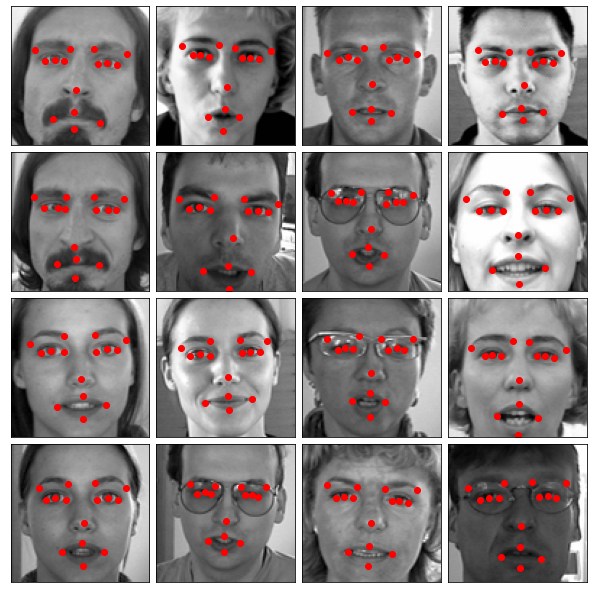

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

from sklearn.model_selection import train_test_split 
from matplotlib import pyplot as plt
%matplotlib inline 

IdLookupTable = pd.read_csv('IdLookupTable.csv')
IdLookupTable.info()
IdLookupTable.head()

SampleSubmission = pd.read_csv('SampleSubmission.csv')
SampleSubmission.info()

SampleSubmission.head()

test = pd.read_csv('test.csv')
test.info()
test.head()

training = pd.read_csv('training.csv')
training.info()

training.head(2)


training = training.dropna()
#training.fillna(method = 'ffill',inplace = True)

training.shape, type(training)

training['Image'] = training['Image'].apply(lambda x: np.fromstring(x, dtype=int, sep=' ').reshape((96,96)))

def get_image_and_dots(df, index):
    image = plt.imshow(df['Image'][index],cmap='gray')
    l = []
    for i in range(1,31,2):
        l.append(plt.plot(df.loc[index][i-1], df.loc[index][i], 'ro'))
        
    return image, l
	
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    get_image_and_dots(training, i)

plt.show()

X = np.asarray([training['Image']], dtype=np.uint8).reshape(training.shape[0],96,96,1)
y = training.drop(['Image'], axis=1)

y2 = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.3, random_state=42)


################################
#   Build your model           #
################################

In [7]:
print('x train:', X_train.shape)
print('y train :', y_train.shape)
print('-------------------------')
print('x test:' , X_test.shape)
print('y test:', y_test.shape)

x train: (1498, 96, 96, 1)
y train : (1498, 30)
-------------------------
x test: (642, 96, 96, 1)
y test: (642, 30)


In [8]:
y_train

array([[65.55279785, 38.91971449, 29.90048057, ..., 77.71878096,
        42.80610654, 79.4357758 ],
       [65.73737143, 33.34834286, 26.05268571, ..., 70.8456    ,
        44.4888    , 80.84468571],
       [67.9316019 , 36.93934408, 28.68853081, ..., 74.55605687,
        43.32830332, 87.97558294],
       ...,
       [67.24939806, 35.8583301 , 29.76093204, ..., 66.26516505,
        47.25530097, 84.17615534],
       [69.7650219 , 38.73740146, 28.71170803, ..., 82.63427737,
        47.55013139, 90.80934307],
       [69.62626415, 32.21859623, 28.74656604, ..., 67.43184906,
        51.00769811, 82.4069434 ]])

In [9]:
y_train[0]

array([65.55279785, 38.91971449, 29.90048057, 36.78294963, 58.39067862,
       39.1571328 , 73.28867801, 39.01863879, 37.63636073, 37.09950739,
       23.68645181, 36.44502423, 56.90865588, 32.1947924 , 78.58353272,
       31.69936664, 41.62477129, 34.79577762, 21.10423645, 28.91111049,
       47.24560169, 58.07097617, 53.58264871, 79.08398475, 33.77171097,
       76.64623937, 43.0352098 , 77.71878096, 42.80610654, 79.4357758 ])

In [10]:
X_train[0]

array([[[ 89],
        [141],
        [139],
        ...,
        [123],
        [168],
        [174]],

       [[112],
        [139],
        [154],
        ...,
        [124],
        [160],
        [166]],

       [[112],
        [127],
        [160],
        ...,
        [138],
        [140],
        [160]],

       ...,

       [[136],
        [115],
        [114],
        ...,
        [131],
        [101],
        [ 92]],

       [[148],
        [113],
        [118],
        ...,
        [113],
        [ 72],
        [107]],

       [[148],
        [145],
        [123],
        ...,
        [ 80],
        [ 86],
        [104]]], dtype=uint8)

# Build Model

In [6]:
from keras import Model
from keras.layers import Conv2D, Dense, LSTM, Input , GlobalMaxPool2D , Concatenate
from keras.layers import Dropout, BatchNormalization
from keras.optimizers import Adam, Adamax, SGD, rmsprop
from keras.losses import MeanSquaredError
import tensorflow as tf
from keras import backend as K
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [8]:
# My 7th model
input_layer = Input(shape= X_train[0].shape)

layer = Conv2D(128, (3,3), padding='valid')(input_layer)
layer = Dropout(0.2)(layer)

layer = Conv2D(64, (5,5), padding='same')(input_layer)
layer = Dropout(0.2)(layer)

layer = Conv2D(64, (3,3), padding='same')(input_layer)
layer = Dropout(0.2)(layer)

path_1 =  Conv2D(32, (7,7), padding='same')(layer)
path_1 =  Dropout(0.2)(path_1)
path_1 = GlobalMaxPool2D()(path_1)


path_2 = Conv2D(32, (5,5), padding='same')(layer)
path_2 = Dropout(0.2)(path_2)
path_2 = GlobalMaxPool2D()(path_2)

path_3 = Conv2D(32, (5,5), padding='same')(layer)
path_3 = Dropout(0.2)(path_3)
path_3 = GlobalMaxPool2D()(path_3)

combined = Concatenate()([path_1,path_2,path_3])

out = Dense(30, activation = 'relu')(combined)

model_7 = Model(input_layer, out)
model_7.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 96, 96, 1)    0                                            
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 96, 96, 64)   640         input_2[0][0]                    
__________________________________________________________________________________________________
dropout_9 (Dropout)             (None, 96, 96, 64)   0           conv2d_9[0][0]                   
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 96, 96, 32)   100384      dropout_9[0][0]                  
____________________________________________________________________________________________

In [9]:
epochs = 1000
batch_size = 10
lr = 0.1

def RMSE(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true))) 

model_7.compile( optimizer='Adam', loss= RMSE, metrics= ['accuracy'])

history = model_7.fit( X_train, y_train, batch_size=batch_size, epochs= epochs, verbose=1, validation_split=0.1, shuffle=True)

Train on 1348 samples, validate on 150 samples
Epoch 1/1000
1348/1348 [==============================] - 8s 6ms/step - loss: 39.1615 - accuracy: 0.1142 - val_loss: 38.9317 - val_accuracy: 0.2733
Epoch 2/1000
1348/1348 [==============================] - 5s 3ms/step - loss: 37.0498 - accuracy: 0.1469 - val_loss: 35.2613 - val_accuracy: 0.2467
Epoch 3/1000
1348/1348 [==============================] - 5s 4ms/step - loss: 33.8351 - accuracy: 0.1751 - val_loss: 35.0296 - val_accuracy: 0.2400
Epoch 4/1000
1348/1348 [==============================] - 5s 4ms/step - loss: 33.6892 - accuracy: 0.1795 - val_loss: 35.7741 - val_accuracy: 0.1867
Epoch 5/1000
1348/1348 [==============================] - 5s 4ms/step - loss: 33.6685 - accuracy: 0.1728 - val_loss: 35.4289 - val_accuracy: 0.2000
Epoch 6/1000
1348/1348 [==============================] - 5s 4ms/step - loss: 33.6024 - accuracy: 0.1921 - val_loss: 35.4460 - val_accuracy: 0.1933
Epoch 7/1000
1348/1348 [==============================] - 5s 4ms/

In [10]:
model_7.evaluate(x=X_test, y= y_test, verbose=1 )

642/642 [==============================] - 1s 1ms/step


[31.349555167082315, 0.6900311708450317]

In [11]:
model_7.save('my_7th_model')

In [12]:
y_predicted = model_7.predict(X_test)

In [13]:
y_predicted

array([[ 81.2063  ,  84.83246 ,   0.      , ...,  70.741806,   0.      ,
        149.60773 ],
       [ 58.103333,  78.66665 ,   0.      , ...,  70.703545,   9.389854,
        128.71098 ],
       [ 60.84397 ,  64.449196,   0.      , ...,  66.07315 ,  17.701029,
        108.84663 ],
       ...,
       [ 63.238766, 122.84187 ,   0.      , ...,  48.327713,   9.565686,
        158.09256 ],
       [ 70.206535,  70.03796 ,   0.      , ...,  62.734455,  29.609344,
        105.48105 ],
       [ 99.55113 ,  72.45971 ,   0.      , ...,  74.30159 ,  37.92761 ,
        143.39375 ]], dtype=float32)

In [58]:
y_test

array([[66.31733333, 37.55633333, 28.7       , ..., 69.13866667,
        49.62066667, 87.64566667],
       [68.78516118, 37.62005935, 31.35922613, ..., 73.15126829,
        43.86623671, 76.44452645],
       [65.19756522, 35.16556522, 29.376     , ..., 68.13426087,
        47.44521739, 80.18052174],
       ...,
       [70.66897297, 34.28021622, 30.47091892, ..., 67.90745946,
        54.04886486, 86.07308108],
       [63.98601681, 37.63038655, 26.49115966, ..., 67.55415126,
        48.84383193, 85.58117647],
       [63.70921739, 36.77662609, 31.9986087 , ..., 68.62469565,
        48.73182609, 77.48521739]])

In [14]:
y_predicted[0]

array([8.12062988e+01, 8.48324585e+01, 0.00000000e+00, 8.37190151e-02,
       4.58028679e+01, 4.79785614e+01, 1.04648766e+02, 6.28158798e+01,
       1.08197193e+01, 2.07164307e+01, 0.00000000e+00, 0.00000000e+00,
       2.84644623e+01, 3.29193916e+01, 1.09348824e+02, 5.51894455e+01,
       3.02752457e+01, 3.46274567e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.04687366e+01, 3.04164639e+01, 7.92714081e+01,
       0.00000000e+00, 6.13746948e+01, 0.00000000e+00, 7.07418060e+01,
       0.00000000e+00, 1.49607727e+02], dtype=float32)

In [42]:
y_test[0]

array([66.31733333, 37.55633333, 28.7       , 37.75766667, 58.27066667,
       37.95866667, 75.16833333, 37.75766667, 37.95333333, 38.361     ,
       20.45233333, 39.16566667, 56.058     , 29.91233333, 80.19733333,
       32.125     , 39.965     , 30.11333333, 14.21633333, 36.55066667,
       49.62066667, 58.67833333, 68.12766667, 72.55866667, 29.50466667,
       72.75966667, 49.21833333, 69.13866667, 49.62066667, 87.64566667])

In [43]:
y_predicted[0][0]

81.2063

In [44]:
y_test[0][0]

66.3173333333

# Results

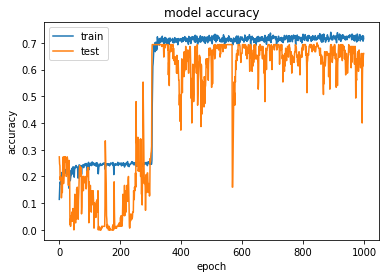

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')

plt.show() 

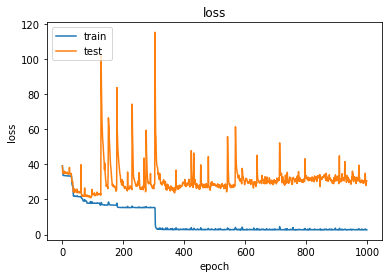

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')


plt.show() 

(81.17309, 75.71107)


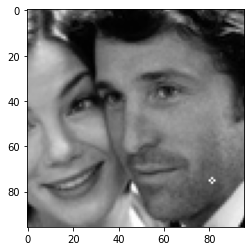

In [76]:
import cv2 
from google.colab.patches import cv2_imshow
#https://www.geeksforgeeks.org/python-opencv-cv2-circle-method/


# images are in x_test
# point are in predicted

image = X_test[3]
point = (y_predicted[3][0] , y_predicted[3][1] )
print(point)

# Center coordinates 
center_coordinates = point
#(120, 50)
  
# Radius of circle 
radius = 1
   
# Blue color in BGR 
color = (255, 0, 0) 
   
# Line thickness of 1 px 
thickness = 1
   
# Using cv2.circle() method 
# Draw a circle with blue line borders of thickness of 2 px 
image = cv2.circle(image, center_coordinates, radius, color, thickness) 
   
# Displaying the image  
#cv2.imshow(image)  

# https://github.com/jupyter/notebook/issues/3935
def cv2_imshow(a, **kwargs):
    a = a.clip(0, 255).astype('uint8')
    # cv2 stores colors as BGR; convert to RGB
    if a.ndim == 3:
        if a.shape[2] == 4:
            a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
        else:
            a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)

    return plt.imshow(a, **kwargs)

cv2_imshow(image)

(62, 35)


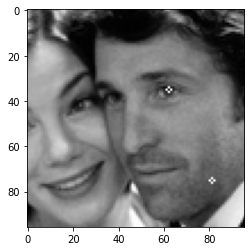

In [77]:
image = X_test[3]
Y_test = np.array(y_test)
point = (int(Y_test[3][0] ) , int(Y_test[3][1] ))
print(point)

# Center coordinates 
center_coordinates = point
#(120, 50)
   
# Using cv2.circle() method 
# Draw a circle with blue line borders of thickness of 2 px 
image = cv2.circle(image, center_coordinates, radius, color, thickness) 
   
cv2_imshow(image)